# 02. Neural Networks Classification with Pytorch

Classification is a problem of prediciting whether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

In [4]:
#make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
len(X),len(y)

(1000, 1000)

In [6]:
print(f"first 5 sames of X: {X[:5]}")
print(f'first 5 sames of y: {y[:5]}')

first 5 sames of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 sames of y: [1 1 1 1 0]


In [7]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [8]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


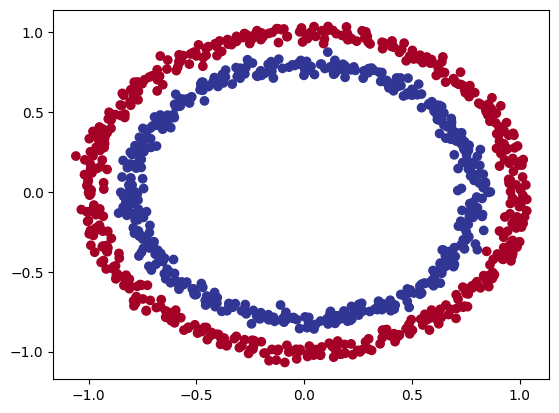

In [9]:
# visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice fundamentals

### 1.1 Check input and output shapes

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [12]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Valyes for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape for one sample of X {X_sample.shape} and the same for y: {y_sample.shape}')

Valyes for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [14]:
# turn data into tensors
import torch
torch.__version__

'2.3.0+cu121'

In [15]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X)

torch.Tensor

In [18]:
torch.manual_seed(42)

In [19]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [21]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [22]:
# Import PyTorch and nn
import torch
from torch import nn

#maake device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [23]:
device

'cuda'

Now we have setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation)
4. Instatiate an instance of our model class and send it to the target device

In [24]:
# 1. Construct a model that subclasses nn. module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear laters capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5,out_features=1) #takes in 5 features from previous layer and outputs a single feature (same shape as y)

  #define a foward method that outlines the forward path
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# 4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
device

'cuda'

In [26]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [27]:
#lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [29]:
#make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')

print(f'first 10 predicions: \n {torch.round(untrained_preds[:10])}')
print(f'\n First 10 labels: {y_test[:10]}')

length of predictions: 200, Shape: torch.Size([200, 1])
first 10 predicions: 
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimzer should you use?

Again...this is problem specific.

For example for regression you might want MAE or MSE (mean abs error or mean square error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your models predictions are

And for optimizer, two of the most common and useful are SGD and adam, however pytorch has many built in options


In [30]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [31]:
# calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


### 3. Training Model

To train our model, we're going to need to build a training loop with the following steps

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Backpropagation
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g sigmoid for binary classificiation and softmax for multiclass classification).

Then, we can convert our model's predicition probabailities to **prediction label** by either rounding them or taking the `argmax()`

In [32]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [33]:
# use the sigmoid activation function on our model logits to turn them into pred prob
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our predicition probability values, we need to perform a range style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class=1)
* `y_pred_probs` < 0.5, `y=0` (class=0)

In [34]:
y_preds = torch.round(y_pred_probs)

#in full (logits->pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 building and training a test loop

In [35]:
device

'cuda'

In [36]:
!nvidia-smi

Fri Jun 28 00:41:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0              29W /  70W |    151MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [37]:
torch.cuda.manual_seed(42)

#set the number of epoch
epochs = 1000

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate loss/accuracy
  loss = loss_fn(y_logits,y_train) ## nn.BCELogitsLoss expects raw logits as input

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred
                    )
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4 loss backward
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate test loss/acc
  test_loss = loss_fn(test_logits,
                      y_test)
  test_acc = accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

  #print out whats happenin
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | test loss: {test_loss:.5f}%, test acc: {test_acc:.2f}%')


Epoch: 0 | Loss 0.69796, Acc: 51.88% | test loss: 0.69440%, test acc: 58.00%
Epoch: 10 | Loss 0.69590, Acc: 51.25% | test loss: 0.69305%, test acc: 53.00%
Epoch: 20 | Loss 0.69490, Acc: 51.62% | test loss: 0.69254%, test acc: 49.50%
Epoch: 30 | Loss 0.69435, Acc: 51.12% | test loss: 0.69236%, test acc: 49.50%
Epoch: 40 | Loss 0.69401, Acc: 50.88% | test loss: 0.69232%, test acc: 51.00%
Epoch: 50 | Loss 0.69378, Acc: 50.25% | test loss: 0.69234%, test acc: 50.00%
Epoch: 60 | Loss 0.69362, Acc: 50.00% | test loss: 0.69239%, test acc: 51.50%
Epoch: 70 | Loss 0.69351, Acc: 50.25% | test loss: 0.69246%, test acc: 51.00%
Epoch: 80 | Loss 0.69342, Acc: 49.88% | test loss: 0.69254%, test acc: 50.00%
Epoch: 90 | Loss 0.69336, Acc: 49.88% | test loss: 0.69262%, test acc: 53.00%
Epoch: 100 | Loss 0.69331, Acc: 49.25% | test loss: 0.69271%, test acc: 53.00%
Epoch: 110 | Loss 0.69327, Acc: 49.75% | test loss: 0.69279%, test acc: 54.00%
Epoch: 120 | Loss 0.69324, Acc: 50.25% | test loss: 0.69286%, t

### 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

SO to inspect it, let's make some predictions and make them visual!

To do so, we're going to import a function called `plot_decision_boundary()`

In [38]:
import requests
from pathlib import Path

#download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions,plot_decision_boundary

downloading


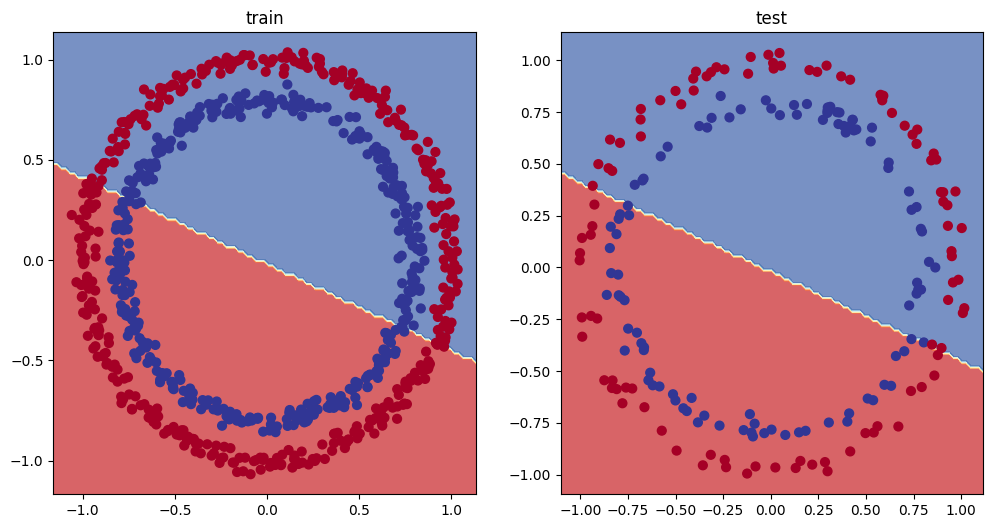

In [39]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

## Improving a model (from a model perspective)

* add more layers - give the model more chances to learn about patterns in the data
* add more hidden units - go from 5 hidden units to 10 hidden units
* fit for longer
* changing the activation function
* change the learning rate
* change the loss function

Let's try and improve our model by:
* adding more hidden units: 5 -> 10
* increase the number of layers 2 -> 3
* increase the number of layers 100 -> 1000


In [40]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)




In [42]:
#write a training and evaluation loop for model 1
torch.manual_seed(42)

#train for longer
epochs = 1000

#put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### training
  model_1.train()
  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calc the loss and acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #calc loss

    test_loss=loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch % 100 ==0:
      print(f'Epoch: {epoch} | loss {loss:.5f}, Acc: {acc:.2f}% | test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ')

Epoch: 0 | loss 0.69713, Acc: 50.00% | test loss: 0.69594, Test acc: 50.00% 
Epoch: 100 | loss 0.69327, Acc: 49.62% | test loss: 0.69334, Test acc: 54.00% 
Epoch: 200 | loss 0.69311, Acc: 49.88% | test loss: 0.69357, Test acc: 50.00% 
Epoch: 300 | loss 0.69305, Acc: 50.62% | test loss: 0.69384, Test acc: 49.50% 
Epoch: 400 | loss 0.69301, Acc: 50.50% | test loss: 0.69407, Test acc: 46.00% 
Epoch: 500 | loss 0.69300, Acc: 51.00% | test loss: 0.69425, Test acc: 47.50% 
Epoch: 600 | loss 0.69299, Acc: 51.50% | test loss: 0.69438, Test acc: 47.00% 
Epoch: 700 | loss 0.69298, Acc: 50.88% | test loss: 0.69447, Test acc: 46.50% 
Epoch: 800 | loss 0.69298, Acc: 51.00% | test loss: 0.69453, Test acc: 46.00% 
Epoch: 900 | loss 0.69298, Acc: 51.50% | test loss: 0.69458, Test acc: 46.00% 


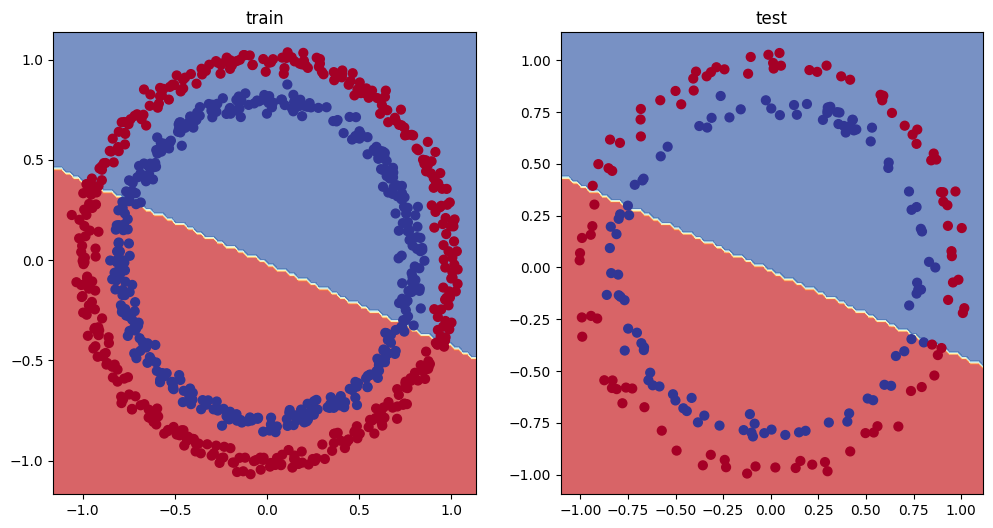

In [43]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparaing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [44]:
#create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#check the data
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [45]:
# create train and test aplits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

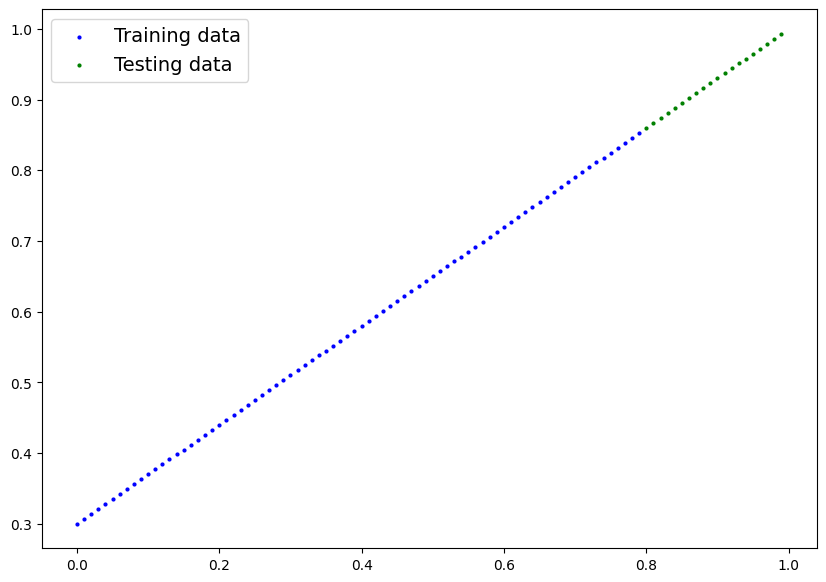

In [46]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjust `model_` to fit a straight line

In [47]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
# same architecture as model 1
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [50]:
# train the model
torch.manual_seed(42)

epochs = 1000

X_train_regression,y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch % 100 == 0:
    print(f'Epoch {epoch} | loss {loss:.5f} | test loss: {test_loss:.5f}')

Epoch 0 | loss 0.75986 | test loss: 0.91103
Epoch 100 | loss 0.02858 | test loss: 0.00081
Epoch 200 | loss 0.02533 | test loss: 0.00209
Epoch 300 | loss 0.02137 | test loss: 0.00305
Epoch 400 | loss 0.01964 | test loss: 0.00341
Epoch 500 | loss 0.01940 | test loss: 0.00387
Epoch 600 | loss 0.01903 | test loss: 0.00379
Epoch 700 | loss 0.01878 | test loss: 0.00381
Epoch 800 | loss 0.01840 | test loss: 0.00329
Epoch 900 | loss 0.01798 | test loss: 0.00360


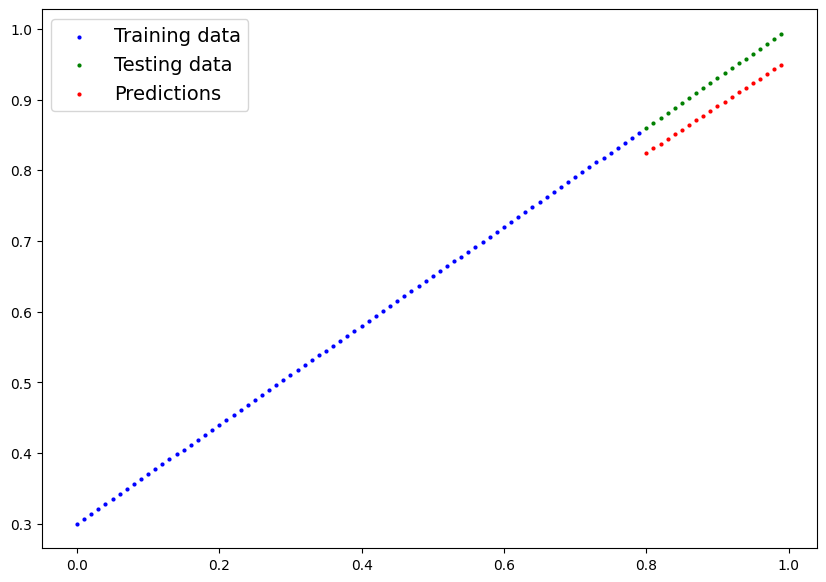

In [51]:
# turn on evaluation
model_2.eval()

#make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#plot data and predicitions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"what patterns could you draw if you were given an infinite amount of straight and non-straight line?"

or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6. 1 Recreating non-linear data (red and blue circles)

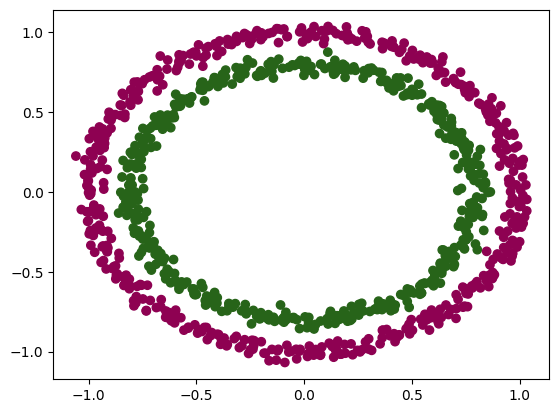

In [52]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.PiYG)

In [53]:
#covert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 building a model with non-linearity
* linear = straight line
* non-linear = non-straight lines

In [54]:
#build a model with non-lienar activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() #non-linear activation function
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

In [56]:
# training loop

epochs = 1000
torch.manual_seed(42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if epoch % 100 == 0:
    print(f'epoch: {epoch}| | loss {loss:.4f} | acc: {acc:2f} | test loss: {test_loss:.4f}, test acc: {test_acc:.3f}')



epoch: 0| | loss 0.6929 | acc: 50.000000 | test loss: 0.6932, test acc: 50.000
epoch: 100| | loss 0.6912 | acc: 52.875000 | test loss: 0.6910, test acc: 52.500
epoch: 200| | loss 0.6898 | acc: 53.375000 | test loss: 0.6894, test acc: 55.000
epoch: 300| | loss 0.6879 | acc: 53.000000 | test loss: 0.6872, test acc: 56.000
epoch: 400| | loss 0.6852 | acc: 52.750000 | test loss: 0.6841, test acc: 56.500
epoch: 500| | loss 0.6810 | acc: 52.750000 | test loss: 0.6794, test acc: 56.500
epoch: 600| | loss 0.6751 | acc: 54.500000 | test loss: 0.6729, test acc: 56.000
epoch: 700| | loss 0.6666 | acc: 58.375000 | test loss: 0.6632, test acc: 59.000
epoch: 800| | loss 0.6516 | acc: 64.000000 | test loss: 0.6476, test acc: 67.500
epoch: 900| | loss 0.6236 | acc: 74.000000 | test loss: 0.6215, test acc: 79.000


### 6.4 Evaluating a model trained with non-linear activation functions

In [57]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

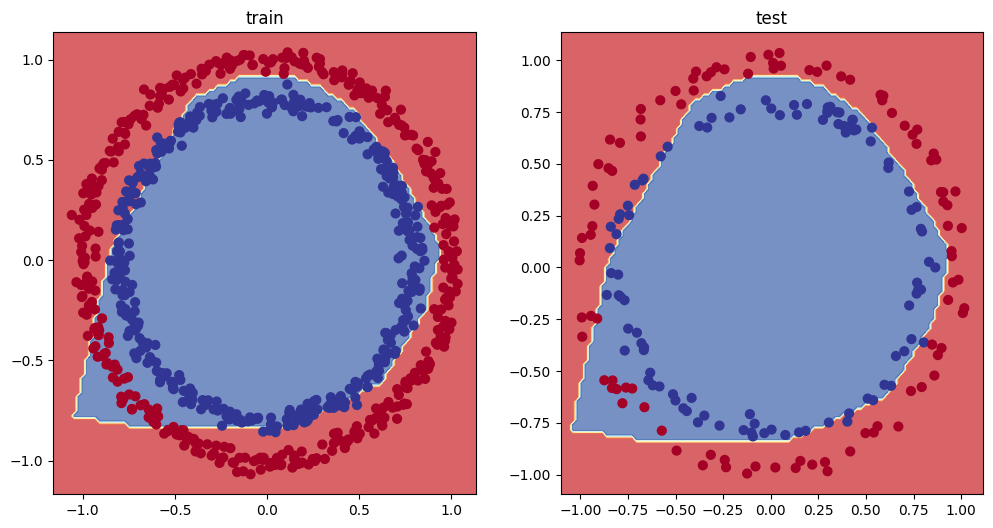

In [58]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replication non-linear activation functions

In [59]:
# create a tensor
A = torch.arange(-10,10,1.0)
A.dtype

torch.float32

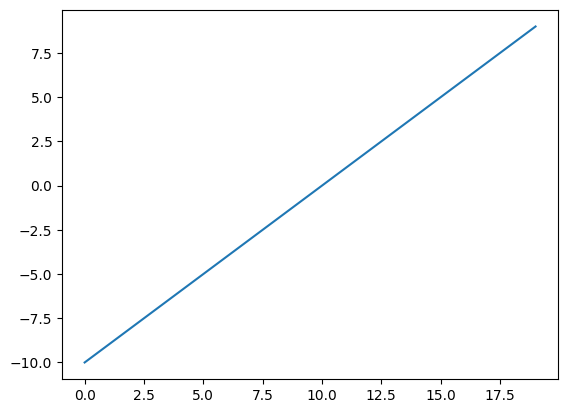

In [60]:
# visiualize
plt.plot(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

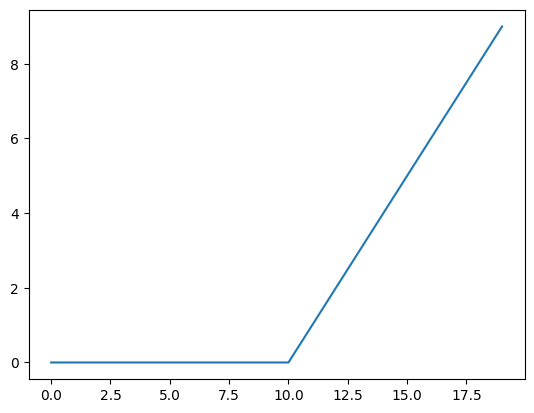

In [61]:
plt.plot(torch.relu(A))
torch.relu(A)

In [62]:
def relu(x):
  return torch.max(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

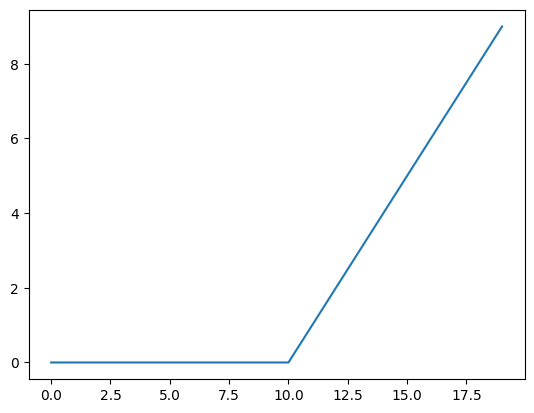

In [63]:
#plot ReLU activiation function
plt.plot(relu(A))

In [64]:
# now let's do the same for sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

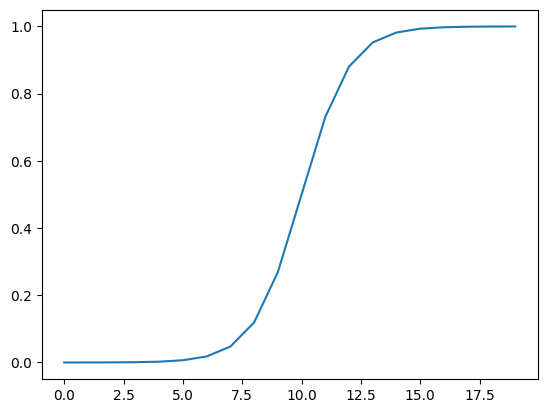

In [65]:
plt.plot(torch.sigmoid(A))

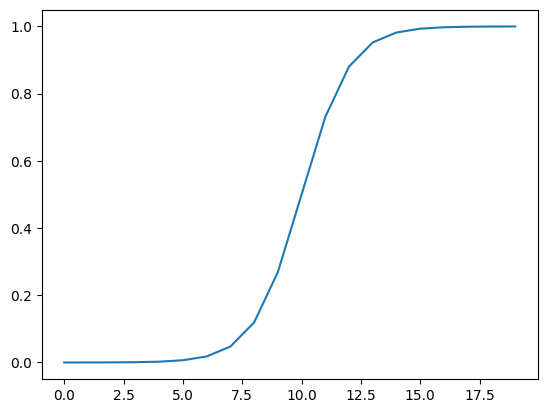

In [66]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

## 8.1 Creating a tou multi-class dataset

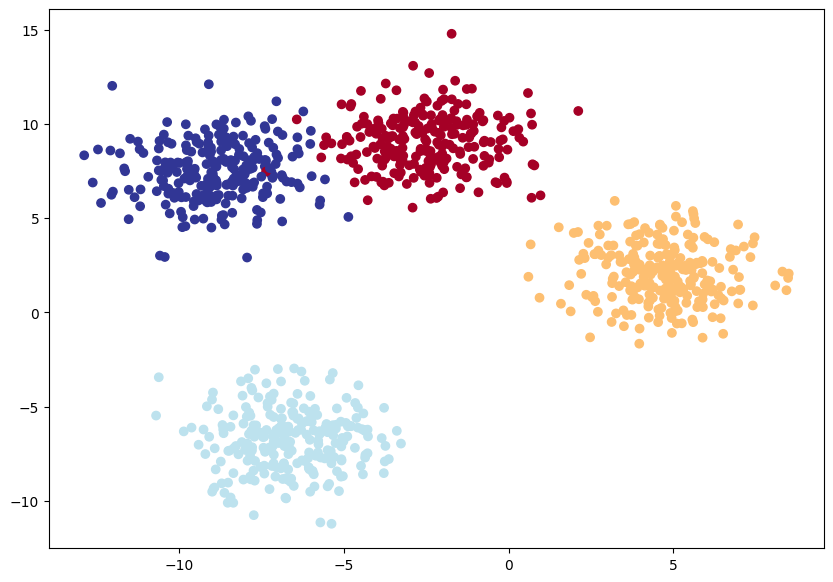

In [67]:
# import depenencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data create
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state=RANDOM_SEED
                            )

#2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                         y_blob,
                                                                         test_size=0.2,
                                                                         random_state=RANDOM_SEED)

#4. plot data (visualize, visualize, visualize)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)




### 8.2 Building a multiclass classification model in PyTorch

In [68]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [69]:
# build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features,hidden_units=8):
    """initializes multi-class classification model.
      Args:
        input_features (int): num of input features to the kodel
        output_features (int): Num of output featyres
        hidden_units (int) : num of hidden units between layers

      returns:

      Examples
      """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(2,4,8).to(device)



In [70]:

X_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

### 8.3 create a loss function and an optimizer for a multi-class classification model

In [71]:
# Create a loss fuction for multi-class classificaion
loss_fn = nn.CrossEntropyLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter


### 8.4 Getting prediction probabilities for a multi-class pytorch model

in order to evaluate and train and test our model, we need to convert the logits to prediction probabilities and then to our labels

In [72]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [73]:
y_pred_probs  = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [74]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [75]:
torch.max(y_pred_probs[0])

tensor(0.3244, device='cuda:0')

In [76]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [77]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:5],y_blob_test[:5]

(tensor([1, 0, 0, 0, 0], device='cuda:0'), tensor([1, 3, 2, 1, 0]))

### 8.5 creating a training and testing loop

In [78]:
# fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set num of epochs
epochs=100

#put the data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ##training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_blob_train,y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_blob_test,test_preds)

  if epoch % 10 == 0:
    print(f'epoch : {epoch} | loss: {loss:.4f}, acc: {acc:.2f}% | test loss {test_loss:.4f},test acc: {test_acc:.4f}%')





epoch : 0 | loss: 1.1588, acc: 40.38% | test loss 1.0755,test acc: 48.0000%
epoch : 10 | loss: 0.6448, acc: 96.75% | test loss 0.6607,test acc: 97.5000%
epoch : 20 | loss: 0.4254, acc: 98.50% | test loss 0.4307,test acc: 100.0000%
epoch : 30 | loss: 0.2529, acc: 99.12% | test loss 0.2451,test acc: 99.5000%
epoch : 40 | loss: 0.1123, acc: 99.25% | test loss 0.1023,test acc: 99.5000%
epoch : 50 | loss: 0.0663, acc: 99.25% | test loss 0.0585,test acc: 99.5000%
epoch : 60 | loss: 0.0507, acc: 99.25% | test loss 0.0429,test acc: 99.5000%
epoch : 70 | loss: 0.0430, acc: 99.25% | test loss 0.0349,test acc: 99.5000%
epoch : 80 | loss: 0.0384, acc: 99.25% | test loss 0.0299,test acc: 99.5000%
epoch : 90 | loss: 0.0352, acc: 99.25% | test loss 0.0266,test acc: 99.5000%


### 8.6 making and evaluating predictions

In [79]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)


  #view the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [80]:
y_pred_probs = torch.softmax(y_logits,dim=1).argmax(dim=1)
y_pred_probs[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

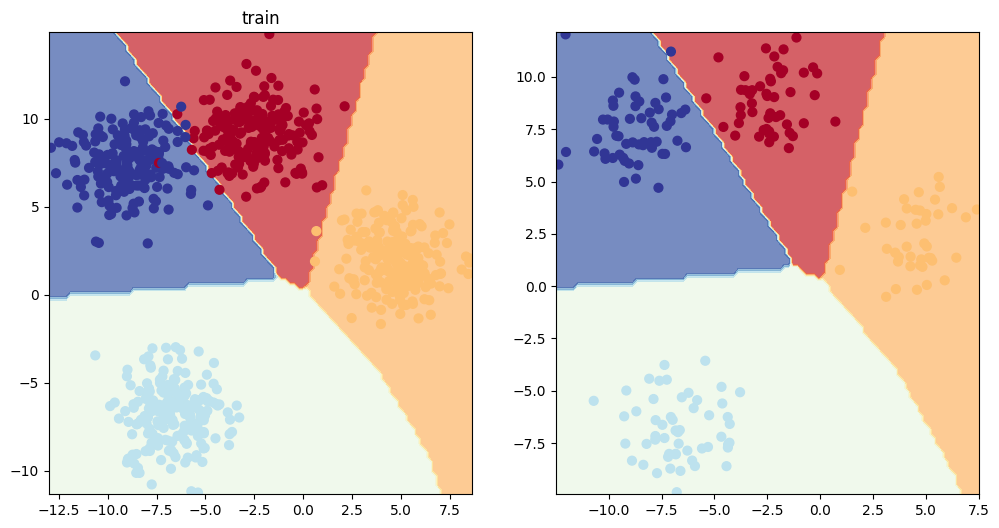

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classification metrics... (to evaluate out model)

* accuracy - out of 100, how many does it get correct
* precision
* recall
* F1-score
* confusion matrix
* classification report



In [82]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [83]:
from torchmetrics import Accuracy

torchmetric_acc = Accuracy(task='multiclass',num_classes=4).to(device)
torchmetric_acc(y_pred_probs,y_blob_test)


tensor(0.9950, device='cuda:0')